In [0]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,Flatten,Dropout,Conv2D,MaxPool2D
from keras import backend as k

In [0]:
batch_size=128
num_class=10
epochs=12

In [3]:
img_rows,img_cols=28,28
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [0]:
if k.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [6]:
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_train=x_train/255
x_test=x_test/255
print("X_train Shape:",x_train.shape)
print("train samples=",x_train.shape[0])
print('test samples=',x_test.shape[0])

X_train Shape: (60000, 28, 28, 1)
train samples= 60000
test samples= 10000


In [0]:
y_train = keras.utils.to_categorical(y_train, num_class)
y_test = keras.utils.to_categorical(y_test, num_class)

In [10]:
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


In [0]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_shape))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_class,activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

In [20]:
history=model.fit(x=x_train,y=y_train,batch_size=batch_size,epochs=epochs,validation_data=(x_test,y_test))
score=model.evaluate(x_test,y_test,verbose=0)
print('Test loss:',score[0])
print('Test accuracy:',score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 5s 77us/step - loss: 0.0169 - acc: 0.9943 - val_loss: 0.0285 - val_acc: 0.9922
Epoch 2/12
60000/60000 [==============================] - 5s 76us/step - loss: 0.0171 - acc: 0.9945 - val_loss: 0.0279 - val_acc: 0.9923
Epoch 3/12
60000/60000 [==============================] - 5s 77us/step - loss: 0.0174 - acc: 0.9946 - val_loss: 0.0291 - val_acc: 0.9916
Epoch 4/12
60000/60000 [==============================] - 5s 76us/step - loss: 0.0159 - acc: 0.9948 - val_loss: 0.0300 - val_acc: 0.9919
Epoch 5/12
60000/60000 [==============================] - 5s 77us/step - loss: 0.0148 - acc: 0.9950 - val_loss: 0.0290 - val_acc: 0.9916
Epoch 6/12
60000/60000 [==============================] - 5s 77us/step - loss: 0.0150 - acc: 0.9953 - val_loss: 0.0344 - val_acc: 0.9917
Epoch 7/12
60000/60000 [==============================] - 5s 76us/step - loss: 0.0161 - acc: 0.9946 - val_loss: 0.0303 - val_acc

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import time
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

Test score: 0.028796753009248822
Test accuracy: 0.9919


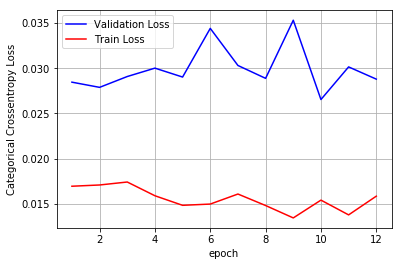

In [22]:
score=model.evaluate(x_test,y_test,verbose=0)
x = list(range(1,13))
print('Test score:', score[0]) 
print('Test accuracy:', score[1])
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)